<a href="https://colab.research.google.com/github/shiva-02/don/blob/master/Project_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MACHINE LEARNING PROJECT (MANB2153 2019/2020 - SEM2)
BY: Aizat, Lohini, Pauline and Shivapriya
Question

> Your team has been approached by a client to solve their business problem. You are required to propose several solutions (at least 3 variations of solutions) to the client using different machine learning techniques.

> The different solutions need to be developed, using Python or R, and the results need to be compared.


> Our business problem is on predicting the turnover of employee in Hola Logistics using Machine Learning Techniques.





### DESCRIBE DATA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
df=pd.read_excel('/content/Employee Data.csv' , delimiter=',')
df.head()

,Class,Gender,YOS,Age,Category,Race,Qualification,Dept,RecordType
0,NSL,F,30.89,51.34,Manager,Indian,Degree & Diploma,Dept 91,A
1,NSL,F,27.69,52.50,Non Executive,Indian,High School,Dept 73,A
2,NSL,F,26.92,55.45,Non Executive,Bumiputra,High School,Dept 46,A
3,NSL,M,27.07,57.08,Executive,Bumiputra,High School,Dept 103,A
4,NSL,M,27.52,52.09,Executive,Indian,Degree & Diploma,Dept 37,A


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
df.columns

Index(['Class', 'Gender', 'YOS', 'Age', 'Category', 'Race', 'Qualification',
       'Dept', 'RecordType'],
      dtype='object')

In [ ]:
df.dtypes

Class             object
Gender            object
YOS              float64
Age              float64
Category          object
Race              object
Qualification     object
Dept              object
RecordType        object
dtype: object

In [ ]:
df.shape

(2314, 9)

In [ ]:
df=df.dropna()
df.head()

,Class,Gender,YOS,Age,Category,Race,Qualification,Dept,RecordType
0,NSL,F,30.89,51.34,Manager,Indian,Degree & Diploma,Dept 91,A
1,NSL,F,27.69,52.50,Non Executive,Indian,High School,Dept 73,A
2,NSL,F,26.92,55.45,Non Executive,Bumiputra,High School,Dept 46,A
3,NSL,M,27.07,57.08,Executive,Bumiputra,High School,Dept 103,A
4,NSL,M,27.52,52.09,Executive,Indian,Degree & Diploma,Dept 37,A


In [ ]:
df.shape

(2293, 9)



*   After removing null values, there has been a reduction in the rows of data. This shows rows with null variables has been removed from the dataset as a process of DATA CLEANING.



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2313
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Class          2293 non-null   object  
 1   Gender         2293 non-null   object  
 2   YOS            2293 non-null   float64 
 3   Age            2293 non-null   float64 
 4   AgeGroup       2293 non-null   category
 5   Category       2293 non-null   object  
 6   Race           2293 non-null   object  
 7   Qualification  2293 non-null   object  
 8   Dept           2293 non-null   object  
 9   RecordType     2293 non-null   object  
dtypes: category(1), float64(2), object(7)
memory usage: 181.6+ KB


In [ ]:
categorical_features = ["Class", "Category", "Gender", "Race", "Qualification", "Dept" , "AgeGroup"] 
                        
numerical_features = ["YOS", "Age"]

target = ["RecordType"]

In [ ]:
df[numerical_features].describe()

,YOS,Age
count,2293.000000,2293.000000
mean,9.330497,38.043908
std,8.715325,9.634033
min,0.030000,21.540000
25%,2.250000,30.620000
50%,6.630000,36.330000
75%,13.800000,44.190000
max,45.870000,67.450000


In [ ]:
df.describe()

In [ ]:
df.describe(include=np.object)

,Class,Gender,Category,Race,Qualification,Dept,RecordType
count,2293,2293,2293,2293,2293,2293,2293
unique,2,2,4,4,4,131,2
top,NSL,F,Executive,Chinese,Degree & Diploma,Dept 36,A
freq,1723,1531,1409,1223,1545,120,2137




*   With this information, we can figure out easily the highest value in each variable. For instance, our data has more female than male and more from non sales class. Employees who hold executive position is the most too.



In [ ]:
pd.set_option('display.max_rows', None)
df_ages = df['Age']
df_ages.head()

0    51.34
1    52.50
2    55.45
3    57.08
4    52.09
Name: Age, dtype: float64

In [ ]:
df=df.drop(columns="AgeGroup")

In [ ]:
category = pd.cut(df.Age,bins=[20,29,39,49,59,69],labels=['20s','30s','40s','50s','60s'])
df.insert(4,'AgeGroup',category)

In [ ]:
df.head()

,Class,Gender,YOS,Age,AgeGroup,Category,Race,Qualification,Dept,RecordType
0,NSL,F,30.89,51.34,50s,Manager,Indian,Degree & Diploma,Dept 91,A
1,NSL,F,27.69,52.50,50s,Non Executive,Indian,High School,Dept 73,A
2,NSL,F,26.92,55.45,50s,Non Executive,Bumiputra,High School,Dept 46,A
3,NSL,M,27.07,57.08,50s,Executive,Bumiputra,High School,Dept 103,A
4,NSL,M,27.52,52.09,50s,Executive,Indian,Degree & Diploma,Dept 37,A




*   Since the age were in continuous form, this code has grouped them to categorical data for easier visualisation.



In [ ]:
df.groupby('AgeGroup').count()

,Class,Gender,YOS,Age,Category,Race,Qualification,Dept,RecordType
AgeGroup,,,,,,,,,
20s,438,438,438,438,438,438,438,438,438
30s,882,882,882,882,882,882,882,882,882
40s,629,629,629,629,629,629,629,629,629
50s,274,274,274,274,274,274,274,274,274
60s,70,70,70,70,70,70,70,70,70


In [ ]:
df.groupby('RecordType').count()

,Class,Gender,YOS,Age,AgeGroup,Category,Race,Qualification,Dept
RecordType,,,,,,,,,
A,2137,2137,2137,2137,2137,2137,2137,2137,2137
R,156,156,156,156,156,156,156,156,156


In [ ]:
#Group of employee in Sales
df[
...     (df["Class"] == "SL") &
...     (df["Age"] > 20.1)
... ].groupby(["AgeGroup", "Category"])['RecordType'].count()

AgeGroup  Category      
20s       Executive          83
          Manager             3
          Senior Manager      0
30s       Executive         147
          Manager            75
          Senior Manager      1
40s       Executive          54
          Manager           100
          Senior Manager     13
50s       Executive          10
          Manager            43
          Senior Manager     13
60s       Executive           4
          Manager            17
          Senior Manager      7
Name: RecordType, dtype: int64

In [ ]:
#Group of employee in Non-Sales
df[
...     (df["Class"] == "NSL") &
...     (df["Age"] > 20.1)
... ].groupby(["AgeGroup", "Category"])['RecordType'].count()

AgeGroup  Category      
20s       Executive         329
          Manager            10
          Non Executive      13
          Senior Manager      0
30s       Executive         433
          Manager           191
          Non Executive      31
          Senior Manager      4
40s       Executive         243
          Manager           174
          Non Executive      31
          Senior Manager     14
50s       Executive          88
          Manager            89
          Non Executive      13
          Senior Manager     18
60s       Executive          18
          Manager            15
          Non Executive       4
          Senior Manager      5
Name: RecordType, dtype: int64

Grouping based on the Sales and Non Sales class of employee

### VISUALIZATION

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7283a3c88>,
      dtype=object)

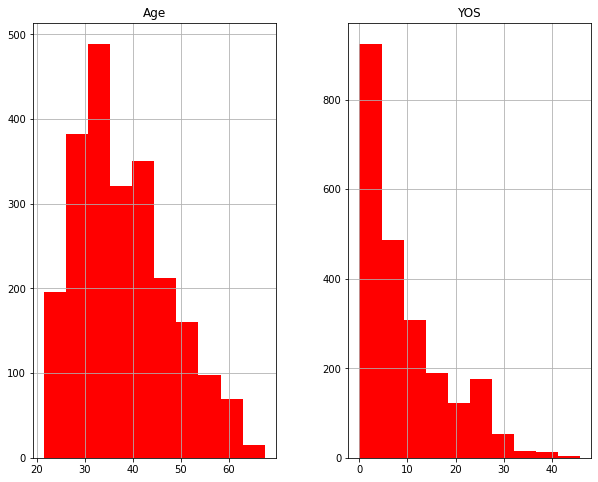

In [ ]:
df[numerical_features].hist(bins=10, color="red" , figsize=(10, 8))

*   We can see that the majority of the employee are between age 30-35 and very few employees are above 60 years old.
*   The years of experience on the other hand is skewed to the left with a majority with only maximum of 5 years with Hola Logistics.



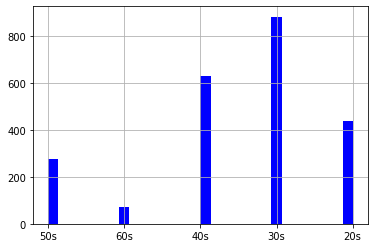

In [ ]:
df['AgeGroup'].hist(bins=30, color="blue" , figsize=(6, 4))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8277a71208>,
      dtype=object)

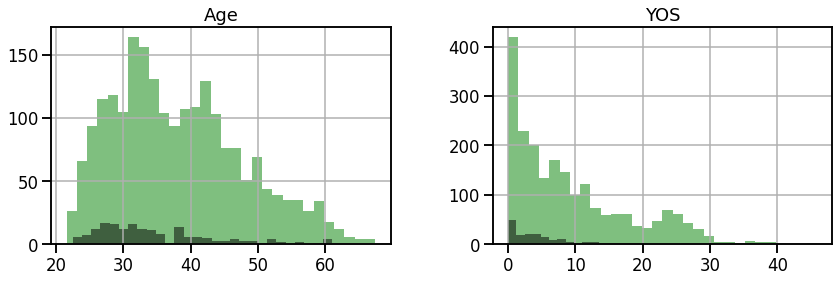

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
df[df.RecordType == "A"][numerical_features].hist(bins=30, color="green",
alpha=0.5, ax=ax)
df[df.RecordType == "R"][numerical_features].hist(bins=30, color="black",
alpha=0.5, ax=ax)

*   The highest age group that tend to resign is the 20s-30s group. That age group has a normal distributed bell shaped curve. The older age group are less likely to resign.
*   The plot shows only the employee with less than 10 years of service is resigning whereas after 15years of experience, nobody has resigned from Hola Logistics.

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



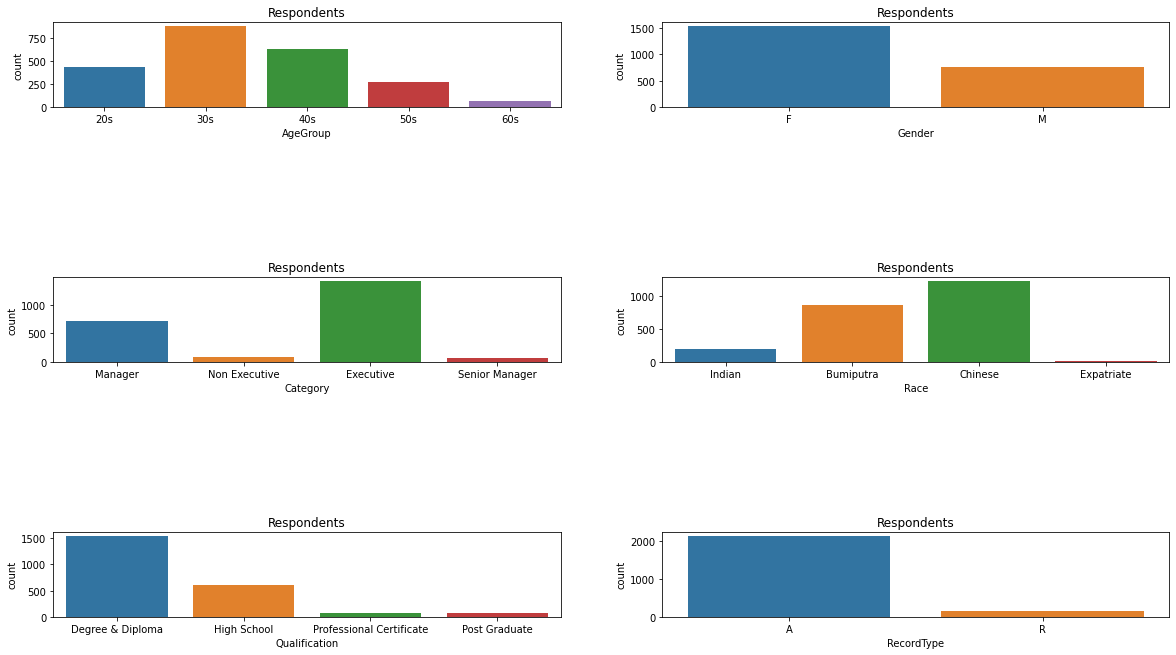

In [ ]:
features=['AgeGroup', 'Gender', 'Category', 'Race', 'Qualification', 'RecordType']
fig=plt.subplots(figsize=(20,25))
for i, j in enumerate(features):
    plt.subplot(6, 2, i+7)
    plt.subplots_adjust(hspace = 2.0)
    sns.countplot(x=j,data = df)
    plt.xticks(rotation=360)
    plt.title("Respondents")



*   The above are the visuals of bar chart of all the categorical data. This easily shows us the group with highest numbers too. 



In [ ]:
count_unique=df['RecordType'].value_counts()
df_count_unique = count_unique.rename_axis('RecordType').reset_index(name='Number')
colors = ['lightslategray',] * 2
fig = px.bar(df_count_unique, x='RecordType', y='Number' , color='Number') 
fig.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set_context('talk')

In [ ]:
df.groupby(['RecordType', 'AgeGroup', 'Gender']).size()

RecordType  AgeGroup  Gender
A           20s       F         263
                      M         130
            30s       F         546
                      M         267
            40s       F         411
                      M         193
            50s       F         177
                      M          86
            60s       F          32
                      M          32
R           20s       F          31
                      M          14
            30s       F          48
                      M          21
            40s       F          13
                      M          12
            50s       F           7
                      M           4
            60s       F           3
                      M           3
dtype: int64



*   By grouping, we can see that majority who is active and also who has resigned is from the age group of 30s and mostly female.


In [ ]:
import plotly.graph_objects as go
AgeGroup=['20s', '30s', '40s', '50s', '60s']

fig = go.Figure(data=[
    go.Bar(name='Active', x=AgeGroup, y=[393,813, 604, 263, 64]),
    go.Bar(name='Resigned', x=AgeGroup, y=[45,69, 25, 11, 6]) ])


fig.update_layout(barmode='group')
fig.show()

In [ ]:
df.groupby(['Race', 'Category', 'Gender']).size()

Race        Category        Gender
Bumiputra   Executive       F         446
                            M         182
            Manager         F          83
                            M          59
            Non Executive   F          41
                            M          40
            Senior Manager  F           1
                            M           5
Chinese     Executive       F         468
                            M         186
            Manager         F         327
                            M         176
            Non Executive   F           6
                            M           1
            Senior Manager  F          26
                            M          33
Expatriate  Executive       F           4
                            M           2
            Manager         F           6
                            M           5
            Senior Manager  F           1
                            M           3
Indian      Executive       F          85


*   We know that the executive post were the majority role of employees but with this we're able to see that mostly are also females and chinese reocords the highest employee.



In [ ]:
df.groupby(['RecordType', 'Gender']).size()

RecordType  Gender
A           F         1436
            M          714
R           F          117
            M           64
dtype: int64

Text(0, 0.5, 'No.of Employee')

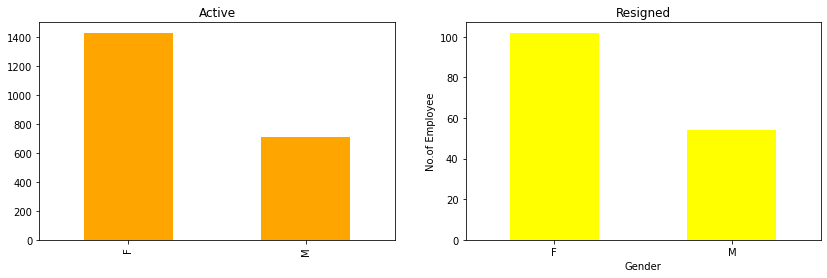

In [ ]:
feature = 'Gender'
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
df[df.RecordType == "A"][feature].value_counts().plot(kind='bar', ax=ax[0], color="orange").set_title('Active')
df[df.RecordType == "R"][feature].value_counts().plot(kind='bar', ax=ax[1], color="yellow").set_title('Resigned')
plt.xticks(rotation=360)
plt.xlabel('Gender')
plt.ylabel('No.of Employee')

In [ ]:
import array as array
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

<Figure size 7200x7200 with 0 Axes>

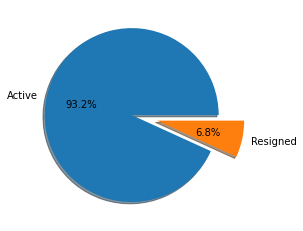

<Figure size 7200x7200 with 0 Axes>

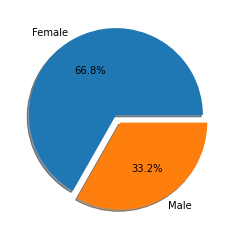

<Figure size 7200x7200 with 0 Axes>

In [ ]:
## Active vs Resign ##
fig2, ax2 = plt.subplots()
count_unique=df['RecordType'].value_counts()
plt.pie([count_unique['A'], count_unique['R']], explode=(0,0.3), labels=['Active','Resigned'],autopct='%1.1f%%', shadow=True)
plt.figure(figsize=(100,100))

## Male vs Female ##
fig2, ax2 = plt.subplots()
count_unique=df['Gender'].value_counts()
plt.pie([count_unique['F'], count_unique['M']], explode=(0,0.1), labels=['Female','Male'],autopct='%1.1f%%', shadow=True)
plt.figure(figsize=(100,100))



*   From the pie chart it's evident that it's an imbalance dataset.



<Figure size 7200x7200 with 0 Axes>

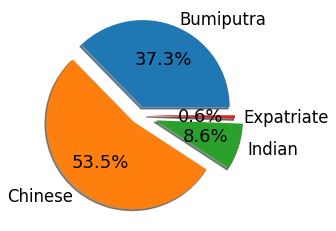

<Figure size 7200x7200 with 0 Axes>

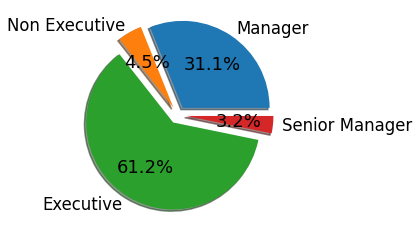

<Figure size 7200x7200 with 0 Axes>

In [ ]:
## Race ##
fig2, ax2 = plt.subplots()
count_unique=df['Race'].value_counts()
plt.pie([count_unique['Bumiputra'], count_unique['Chinese'], count_unique['Indian'], count_unique['Expatriate']], 
        explode=(0.1,0.1,0.2,0.1), labels=['Bumiputra', 'Chinese', 'Indian', 'Expatriate' ],autopct='%1.1f%%', shadow=True)
plt.figure(figsize=(100,100))

## Education Attainment ##
fig2, ax2 = plt.subplots()
count_unique=df['Category'].value_counts()
plt.pie([count_unique['Manager'], count_unique['Non Executive'], count_unique['Executive'], count_unique['Senior Manager']], 
        explode=(0.1,0.1,0.1,0.1), labels=['Manager', 'Non Executive', 'Executive', 'Senior Manager' ],autopct='%1.1f%%', shadow=True)
plt.figure(figsize=(100,100))



*   The pie chart shows it crystal clear that the data is mostly on chinese employees and employees with executive position.



### TRAIN-TEST-SPLIT

In [ ]:
#Train-Test split
from sklearn.model_selection import train_test_split
import array as array
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

In [ ]:
# Data Preprocessing
X = df[['YOS','Age']]

# SL - 1, NSL = 0
X['Class'] = df['Class'].apply(lambda x: 1 if x == 'SL' else 0)

# M = 1, F = 0
X['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'M' else 0)

# Category - SeniorManager, Manager, Executive - if all 3 are 0, that is Non-executive
X['SeniorManager'] = df['Category'].apply(lambda x: 1 if x == 'Senior Manager' else 0)
X['Manager'] = df['Category'].apply(lambda x: 1 if x == 'Manager' else 0)
X['Executive'] = df['Category'].apply(lambda x: 1 if x == 'Executive' else 0)

# Race - Indian, Bumiputra, Chinese - if all are 0, that is Expatriate
X['Indian'] = df['Race'].apply(lambda x: 1 if x == 'India' else 0)
X['Bumiputra'] = df['Race'].apply(lambda x: 1 if x == 'Bumiputra' else 0)
X['Chinese'] = df['Race'].apply(lambda x: 1 if x == 'Chinese' else 0)

# Education - Degree_Diploma, HighSchool, PostGrad - if all are 0, that is ProfessionalCertificate
X['Degree_Diploma'] = df['Qualification'].apply(lambda x: 1 if x == 'Degree & Diploma' else 0)
X['HighSchool'] = df['Qualification'].apply(lambda x: 1 if x == 'High School' else 0)
X['PostGrad'] = df['Qualification'].apply(lambda x: 1 if x == 'Post Graduate' else 0)

#Target Variable
y = df['RecordType'].apply(lambda x: 1 if x == 'R' else 0)

#Split data 70:30 to training and testing
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=101)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=101, stratify=y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_s

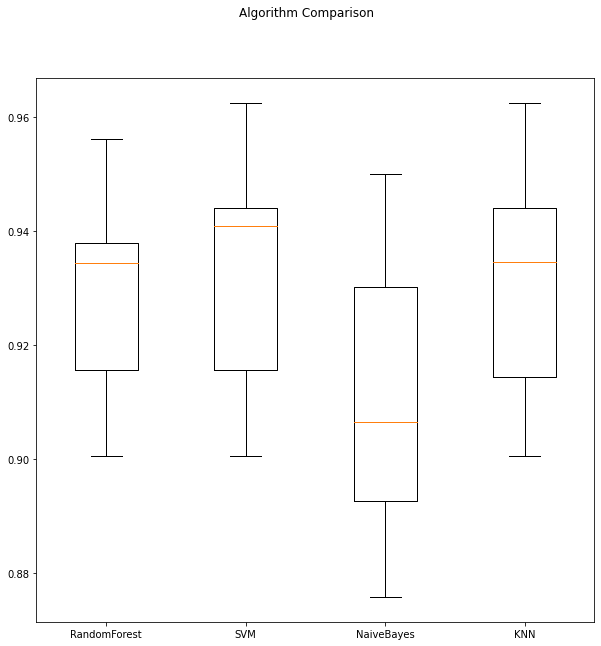


Information-based learning  -  RandomForest
Test Score :  0.9287790697674418
Confusion Matrix


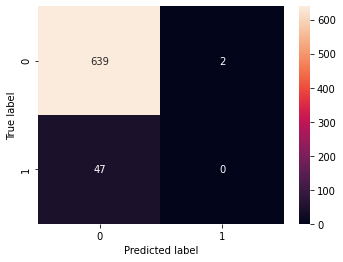

Error-based learning  -  SVM
Test Score :  0.9316860465116279
Confusion Matrix


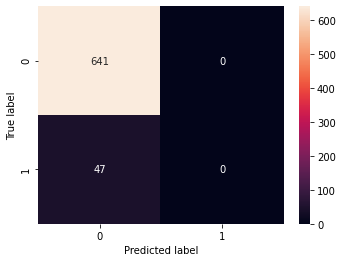

Probability-based learning  -  NaiveBayes
Test Score :  0.9113372093023255
Confusion Matrix


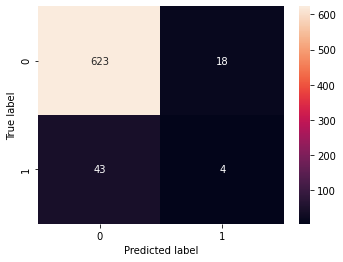

Similarity-based learning  -  KNN
Test Score :  0.9302325581395349
Confusion Matrix


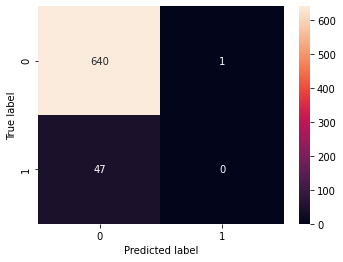

In [ ]:
models = []
models.append(("Information-based learning","RandomForest",RandomForestClassifier()))
models.append(("Error-based learning","SVM",SVC()))
models.append(("Probability-based learning","NaiveBayes",GaussianNB()))
models.append(("Similarity-based learning","KNN",KNeighborsClassifier(n_neighbors=5)))

learnings =[]
names = []
train_results = []
test_results = []
class_results = []
confu_results = []

for learning,name,model in models:
  kfold = KFold(n_splits=10, random_state=1)
  train_result = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  test_result = accuracy_score(y_test, y_pred)
  class_result = classification_report(y_test, y_pred)
  confu_result = confusion_matrix(y_test, y_pred)
  learnings.append(learning)
  names.append(name)
  train_results.append(train_result)
  test_results.append(test_result)
  class_results.append(class_result)
  confu_results.append(confu_result)

print("")
fig = plt.figure(figsize=(10,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(train_results)
ax.set_xticklabels(names)
plt.show()
print("")

for i in range(len(names)):
    print(learnings[i]," - ",names[i])
    print("Test Score : ",test_results[i])
    #print(class_results[i])
    print("Confusion Matrix")
    plt.figure(figsize=(5.5,4))
    sns.heatmap(confu_results[i], annot=True, fmt="d")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

#The accuracy of all models are more than 90%
#The confusion matrix shows all models perform well in predicting the employee without intention of resignation
#The confusion matrix shows all models perform badly in predicting the employee's intention to resign
#This scenario is caused by the imbalance dataset.  The dataset is having 2137 active employees and 156 resigned employees.


1. The accuracy of all models are more than 90%
2. The confusion matrix shows all models perform well in predicting the employee without intention of resignation
3. The confusion matrix shows all models perform badly in predicting the employee's intention to resign
4. This scenario is caused by the imbalance dataset.  The dataset is having 2137 active employees and 156 resigned employees.


> *   Different testing model using cross validation score, MSE score and Accuracy score.









In [ ]:
#Information-based learning - Random Forest
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
print('Cross Validation: %.4f' % np.mean(cross_val_score(RF, X_train, y_train, cv=4)))

RFCy_pred = RF.predict(X_test)

from sklearn.metrics import mean_squared_error
result_mse = mean_squared_error(y_test,RFCy_pred)
print('Test MSE: %.4f' % result_mse)


print('Accuracy: %.4f' % accuracy_score(y_test, RFCy_pred))
print(classification_report(y_test, RFCy_pred))
print(confusion_matrix(y_test, RFCy_pred))

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

rfc_score_train = rfc.score(X_train, y_train)
print("Training_score: ",rfc_score_train)
rfc_score_test = rfc.score(X_test, y_test)
print("Testing_score: ",rfc_score_test)

Cross Validation: 0.9629
Test MSE: 0.0281
Accuracy: 0.9719
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       641
           1       0.95      1.00      0.97       642

    accuracy                           0.97      1283
   macro avg       0.97      0.97      0.97      1283
weighted avg       0.97      0.97      0.97      1283

[[605  36]
 [  0 642]]
Training_score:  1.0
Testing_score:  0.9727201870615745


In [ ]:
#Error-based learning - SVM
from sklearn.svm import LinearSVC

SVM = LinearSVC()
SVM.fit(X_train, y_train)
print('Cross Validation: %.4f' % np.mean(cross_val_score(SVM, X_train, y_train, cv=4)))

SVMy_pred = SVM.predict(X_test)

from sklearn.metrics import mean_squared_error
result_mse = mean_squared_error(y_test,SVMy_pred)
print('Test MSE: %.4f' % result_mse)

print('Accuracy: %.4f' % accuracy_score(y_test, SVMy_pred))
print(classification_report(y_test, SVMy_pred))
print(confusion_matrix(y_test, SVMy_pred))

#SVM
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

svm_score_train = svm.score(X_train, y_train)
print("Training score: ",svm_score_train)
svm_score_test = svm.score(X_test, y_test)
print("Testing score: ",svm_score_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Cross Validation: 0.5032
Test MSE: 0.4949
Accuracy: 0.5051
              precision    recall  f1-score   support

           0       1.00      0.01      0.02       641
           1       0.50      1.00      0.67       642

    accuracy                           0.51      1283
   macro avg       0.75      0.50      0.34      1283
weighted avg       0.75      0.51      0.34      1283

[[  6 635]
 [  0 642]]
Training score:  0.6188565697091274
Testing score:  0.6305533904910366


In [ ]:
#Probability-based learning - Naive Bayes
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(X_train, y_train)
print('Cross Validation: %.4f' % np.mean(cross_val_score(NB, X_train, y_train, cv=4)))

NBy_pred =NB.predict(X_test)

from sklearn.metrics import mean_squared_error
result_mse = mean_squared_error(y_test,NBy_pred)
print('Test MSE: %.4f' % result_mse)

print('Accuracy: %.4f' % accuracy_score(y_test, NBy_pred))
print(classification_report(y_test, NBy_pred))
print(confusion_matrix(y_test, NBy_pred))

NB_score_train = NB.score(X_train, y_train)
print("Training_score: ",NB_score_train)
NB_score_test = NB.score(X_test, y_test)
print("Testing_score: ",NB_score_test)

Cross Validation: 0.5660
Test MSE: 0.4256
Accuracy: 0.5744
              precision    recall  f1-score   support

           0       0.56      0.64      0.60       641
           1       0.59      0.50      0.54       642

    accuracy                           0.57      1283
   macro avg       0.58      0.57      0.57      1283
weighted avg       0.58      0.57      0.57      1283

[[413 228]
 [318 324]]
Training_score:  0.5707121364092277
Testing_score:  0.5744349181605611


In [ ]:
#Similarity-based learning - KNN
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
print('Cross Validation: %.4f' % np.mean(cross_val_score(RF, X_train, y_train, cv=4)))

KNNy_pred = KNN.predict(X_test)

from sklearn.metrics import mean_squared_error
result_mse = mean_squared_error(y_test,KNNy_pred)
print('Test MSE: %.4f' % result_mse)


print('Accuracy: %.4f' % accuracy_score(y_test, KNNy_pred))
print(classification_report(y_test, KNNy_pred))
print(confusion_matrix(y_test, KNNy_pred))


KNN_score_train = KNN.score(X_train, y_train)
print("Training_score: ",KNN_score_train)
KNN_score_test = KNN.score(X_test, y_test)
print("Testing_score: ",KNN_score_test)

Cross Validation: 0.9602
Test MSE: 0.1224
Accuracy: 0.8776
              precision    recall  f1-score   support

           0       1.00      0.76      0.86       641
           1       0.80      1.00      0.89       642

    accuracy                           0.88      1283
   macro avg       0.90      0.88      0.88      1283
weighted avg       0.90      0.88      0.88      1283

[[484 157]
 [  0 642]]
Training_score:  0.9154129053828152
Testing_score:  0.877630553390491


In [ ]:
models = pd.DataFrame({
        'Model'          : ['Random Forest', 'SVM', 'Naive Bayes', 'KNN'],
        'Cross_Val_Score': [0.9265, 0.5018, 0.5660, 0.9616],
        'TEST_mse'       : [0.0265, 0.4981, 0.4256, 0.1224],
        'Accuracy_mse'   : [0.9735, 0.5019, 0.5744, 0.8776],
        'Training_Score' : [rfc_score_train, svm_score_train, NB_score_train, KNN_score_train],
        'Testing_Score'  : [rfc_score_test, svm_score_test, NB_score_test, KNN_score_test]
        })

models.sort_values(by='Testing_Score', ascending=False)

,Model,Cross_Val_Score,TEST_mse,Accuracy_mse,Training_Score,Testing_Score
0,Random Forest,0.9265,0.0265,0.9735,1.000000,0.973500
3,KNN,0.9616,0.1224,0.8776,0.915413,0.877631
1,SVM,0.5018,0.4981,0.5019,0.618857,0.630553
2,Naive Bayes,0.5660,0.4256,0.5744,0.570712,0.574435


From this testing method too, random forest has topped the list with the highest testing and accuracy score. However, as we know the data is imbalanced so the data will be upsampled and compared.

### UP SAMPLED DATA

In [ ]:
#Upsample minority class
from sklearn.utils import resample

df_majority = df[df.RecordType=='A']
df_minority = df[df.RecordType=='R']

print(df_majority.shape)

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=df_majority.shape[0],    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
print(df_upsampled.shape)

(2137, 10)
(4274, 10)


In [ ]:
df.groupby('RecordType').count()

,Class,Gender,YOS,Age,AgeGroup,Category,Race,Qualification,Dept
RecordType,,,,,,,,,
A,2137,2137,2137,2137,2137,2137,2137,2137,2137
R,2137,2137,2137,2137,2137,2137,2137,2137,2137


In [ ]:
df_upsampled.groupby(['RecordType', 'AgeGroup', 'Gender']).size()

RecordType  AgeGroup  Gender
A           20s       F         263
                      M         130
            30s       F         546
                      M         267
            40s       F         411
                      M         193
            50s       F         177
                      M          86
            60s       F          32
                      M          32
R           20s       F         412
                      M         158
            30s       F         651
                      M         289
            40s       F         194
                      M         170
            50s       F          98
                      M          56
            60s       F          58
                      M          51
dtype: int64

<Figure size 7200x7200 with 0 Axes>

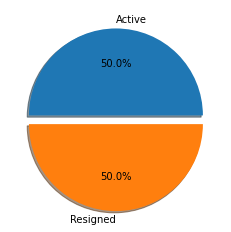

<Figure size 7200x7200 with 0 Axes>

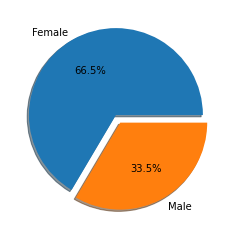

<Figure size 7200x7200 with 0 Axes>

In [ ]:
## Active vs Resign ##
fig2, ax2 = plt.subplots()
count_unique=df_upsampled['RecordType'].value_counts()
plt.pie([count_unique['A'], count_unique['R']], explode=(0,0.1), labels=['Active','Resigned'],autopct='%1.1f%%', shadow=True)
plt.figure(figsize=(100,100))

## Male vs Female ##
fig2, ax2 = plt.subplots()
count_unique=df_upsampled['Gender'].value_counts()
plt.pie([count_unique['F'], count_unique['M']], explode=(0,0.1), labels=['Female','Male'],autopct='%1.1f%%', shadow=True)
plt.figure(figsize=(100,100))

In [ ]:
df_upsampled.groupby(['RecordType', 'AgeGroup']).size()

RecordType  AgeGroup
A           20s         393
            30s         813
            40s         604
            50s         263
            60s          64
R           20s         570
            30s         940
            40s         364
            50s         154
            60s         109
dtype: int64

In [ ]:
import plotly.graph_objects as go
AgeGroup=['20s', '30s', '40s', '50s', '60s']

fig = go.Figure(data=[
    go.Bar(name='Active', x=AgeGroup, y=[393,813, 604, 263, 64]),
    go.Bar(name='Resigned', x=AgeGroup, y=[570,940, 364, 154, 109]) ])


fig.update_layout(barmode='group')
fig.show()



*   After upsampling we can now see a equal distribution of "active" and "resigned" status of employee. Nevertheless, the highest age group who are active and resigned is still the 30s group.



*   However now we the gender is not equally distributed. It's not an issue due to our target variable being status of employee and their age group.





In [ ]:
# Data Preprocessing
df = df_upsampled
X = df[['YOS','Age']]

# SL - 1, NSL = 0
X['Class'] = df['Class'].apply(lambda x: 1 if x == 'SL' else 0)

# M = 1, F = 0
X['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'M' else 0)

# Category - SeniorManager, Manager, Executive - if all 3 are 0, that is Non-executive
X['SeniorManager'] = df['Category'].apply(lambda x: 1 if x == 'Senior Manager' else 0)
X['Manager'] = df['Category'].apply(lambda x: 1 if x == 'Manager' else 0)
X['Executive'] = df['Category'].apply(lambda x: 1 if x == 'Executive' else 0)

# Race - Indian, Bumiputra, Chinese - if all are 0, that is Expatriate
X['Indian'] = df['Race'].apply(lambda x: 1 if x == 'India' else 0)
X['Bumiputra'] = df['Race'].apply(lambda x: 1 if x == 'Bumiputra' else 0)
X['Chinese'] = df['Race'].apply(lambda x: 1 if x == 'Chinese' else 0)

# Education - Degree_Diploma, HighSchool, PostGrad - if all are 0, that is ProfessionalCertificate
X['Degree_Diploma'] = df['Qualification'].apply(lambda x: 1 if x == 'Degree & Diploma' else 0)
X['HighSchool'] = df['Qualification'].apply(lambda x: 1 if x == 'High School' else 0)
X['PostGrad'] = df['Qualification'].apply(lambda x: 1 if x == 'Post Graduate' else 0)

#Target Variable
y = df['RecordType'].apply(lambda x: 1 if x == 'R' else 0)

#Split data 70:30 to training and testing
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=101)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=101, stratify=y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave ra

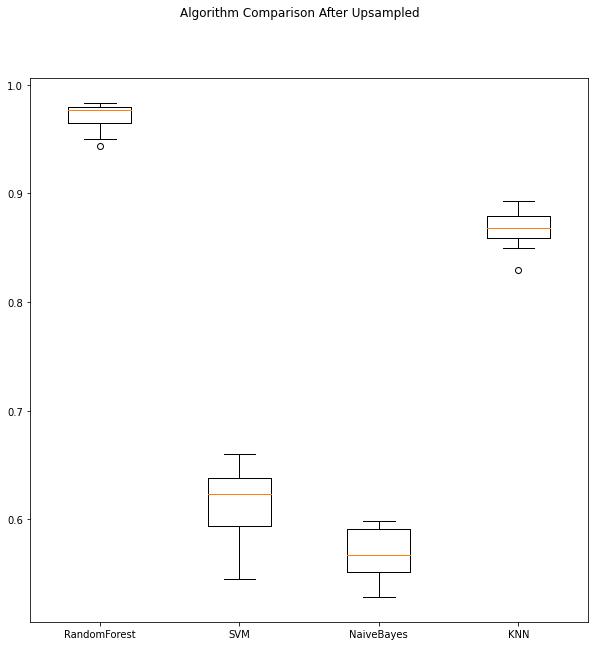


Information-based learning  -  RandomForest
Test Score :  0.9727201870615745
Confusion Matrix


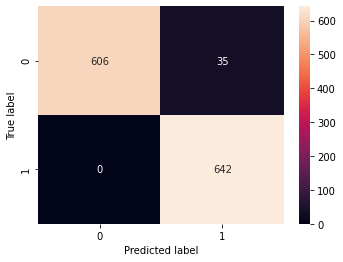

Error-based learning  -  SVM
Test Score :  0.6305533904910366
Confusion Matrix


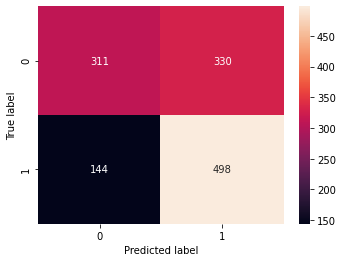

Probability-based learning  -  NaiveBayes
Test Score :  0.5744349181605611
Confusion Matrix


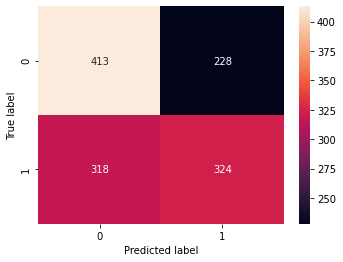

Similarity-based learning  -  KNN
Test Score :  0.877630553390491
Confusion Matrix


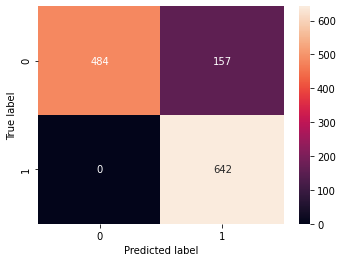

In [ ]:
models = []
models.append(("Information-based learning","RandomForest",RandomForestClassifier()))
models.append(("Error-based learning","SVM",SVC()))
models.append(("Probability-based learning","NaiveBayes",GaussianNB()))
models.append(("Similarity-based learning","KNN",KNeighborsClassifier(n_neighbors=5)))

learnings =[]
names = []
train_results = []
test_results = []
class_results = []
confu_results = []

for learning,name,model in models:
  kfold = KFold(n_splits=10, random_state=1)
  train_result = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  test_result = accuracy_score(y_test, y_pred)
  class_result = classification_report(y_test, y_pred)
  confu_result = confusion_matrix(y_test, y_pred)
  learnings.append(learning)
  names.append(name)
  train_results.append(train_result)
  test_results.append(test_result)
  class_results.append(class_result)
  confu_results.append(confu_result)

print("")
fig = plt.figure(figsize=(10,10))
fig.suptitle('Algorithm Comparison After Upsampled')
ax = fig.add_subplot(111)
plt.boxplot(train_results)
ax.set_xticklabels(names)
plt.show()
print("")

for i in range(len(names)):
    print(learnings[i]," - ",names[i])
    print("Test Score : ",test_results[i])
    #print(class_results[i])
    print("Confusion Matrix")
    plt.figure(figsize=(5.5,4))
    sns.heatmap(confu_results[i], annot=True, fmt="d")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

#After upsampled, the accuracy of models vary a lot.  Random Forest has the highest accuracy of 97% and Naive Bayes has the lowest at 57%
#The confusion matrix shows that Random Forest perform best in predicting the employee without intention of resignation
#The confusion matrix shows that Random Forest and KNN correctly predicted the employee's intention to resign
#Random Forest of information-based learning has shown the best accuracy and prediction performance among 4 algorithms.

1. After upsampled, the accuracy of models vary a lot.  Random Forest has the highest accuracy of 97% and Naive Bayes has the lowest at 57%
2. The confusion matrix shows that Random Forest perform best in predicting the employee without intention of resignation
3. The confusion matrix shows that Random Forest and KNN correctly predicted the employee's intention to resign
4. Random Forest of information-based learning has shown the best accuracy and prediction performance among 4 algorithms.


> *   Different testing model using cross validation score, MSE score and Accuracy score.









In [ ]:
#Information-based learning - Random Forest
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
print('Cross Validation: %.4f' % np.mean(cross_val_score(RF, X_train, y_train, cv=4)))

RFCy_pred = RF.predict(X_test)

from sklearn.metrics import mean_squared_error
result_mse = mean_squared_error(y_test,RFCy_pred)
print('Test MSE: %.4f' % result_mse)


print('Accuracy: %.4f' % accuracy_score(y_test, RFCy_pred))
print(classification_report(y_test, RFCy_pred))
print(confusion_matrix(y_test, RFCy_pred))

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

rfc_score_train = rfc.score(X_train, y_train)
print("Training_score: ",rfc_score_train)
rfc_score_test = rfc.score(X_test, y_test)
print("Testing_score: ",rfc_score_test)

Cross Validation: 0.9626
Test MSE: 0.0288
Accuracy: 0.9712
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       641
           1       0.95      1.00      0.97       642

    accuracy                           0.97      1283
   macro avg       0.97      0.97      0.97      1283
weighted avg       0.97      0.97      0.97      1283

[[604  37]
 [  0 642]]
Training_score:  1.0
Testing_score:  0.9727201870615745


In [ ]:
#Error-based learning - SVM
from sklearn.svm import LinearSVC

SVM = LinearSVC()
SVM.fit(X_train, y_train)
print('Cross Validation: %.4f' % np.mean(cross_val_score(SVM, X_train, y_train, cv=4)))

SVMy_pred = SVM.predict(X_test)

from sklearn.metrics import mean_squared_error
result_mse = mean_squared_error(y_test,SVMy_pred)
print('Test MSE: %.4f' % result_mse)

print('Accuracy: %.4f' % accuracy_score(y_test, SVMy_pred))
print(classification_report(y_test, SVMy_pred))
print(confusion_matrix(y_test, SVMy_pred))

#SVM
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

svm_score_train = svm.score(X_train, y_train)
print("Training score: ",svm_score_train)
svm_score_test = svm.score(X_test, y_test)
print("Testing score: ",svm_score_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Cross Validation: 0.5102
Test MSE: 0.4614
Accuracy: 0.5386
              precision    recall  f1-score   support

           0       0.71      0.13      0.22       641
           1       0.52      0.95      0.67       642

    accuracy                           0.54      1283
   macro avg       0.61      0.54      0.45      1283
weighted avg       0.61      0.54      0.45      1283

[[ 84 557]
 [ 35 607]]
Training score:  0.6188565697091274
Testing score:  0.6305533904910366


In [ ]:
#Probability-based learning - Naive Bayes
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(X_train, y_train)
print('Cross Validation: %.4f' % np.mean(cross_val_score(NB, X_train, y_train, cv=4)))

NBy_pred =NB.predict(X_test)

from sklearn.metrics import mean_squared_error
result_mse = mean_squared_error(y_test,NBy_pred)
print('Test MSE: %.4f' % result_mse)

print('Accuracy: %.4f' % accuracy_score(y_test, NBy_pred))
print(classification_report(y_test, NBy_pred))
print(confusion_matrix(y_test, NBy_pred))

NB_score_train = NB.score(X_train, y_train)
print("Training_score: ",NB_score_train)
NB_score_test = NB.score(X_test, y_test)
print("Testing_score: ",NB_score_test)

Cross Validation: 0.5660
Test MSE: 0.4256
Accuracy: 0.5744
              precision    recall  f1-score   support

           0       0.56      0.64      0.60       641
           1       0.59      0.50      0.54       642

    accuracy                           0.57      1283
   macro avg       0.58      0.57      0.57      1283
weighted avg       0.58      0.57      0.57      1283

[[413 228]
 [318 324]]
Training_score:  0.5707121364092277
Testing_score:  0.5744349181605611


In [ ]:
#Similarity-based learning - KNN
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
print('Cross Validation: %.4f' % np.mean(cross_val_score(RF, X_train, y_train, cv=4)))

KNNy_pred = KNN.predict(X_test)

from sklearn.metrics import mean_squared_error
result_mse = mean_squared_error(y_test,KNNy_pred)
print('Test MSE: %.4f' % result_mse)


print('Accuracy: %.4f' % accuracy_score(y_test, KNNy_pred))
print(classification_report(y_test, KNNy_pred))
print(confusion_matrix(y_test, KNNy_pred))


KNN_score_train = KNN.score(X_train, y_train)
print("Training_score: ",KNN_score_train)
KNN_score_test = KNN.score(X_test, y_test)
print("Testing_score: ",KNN_score_test)

Cross Validation: 0.9622
Test MSE: 0.1224
Accuracy: 0.8776
              precision    recall  f1-score   support

           0       1.00      0.76      0.86       641
           1       0.80      1.00      0.89       642

    accuracy                           0.88      1283
   macro avg       0.90      0.88      0.88      1283
weighted avg       0.90      0.88      0.88      1283

[[484 157]
 [  0 642]]
Training_score:  0.9154129053828152
Testing_score:  0.877630553390491


In [ ]:
models_upsampled = pd.DataFrame({
        'Model'          : ['Random Forest', 'SVM', 'Naive Bayes', 'KNN'],
        'Cross_Val_Score': [0.9626, 0.5102, 0.5660, 0.9622],
        'TEST_mse'       : [0.0288, 0.4614, 0.4256, 0.1224],
        'Accuracy_mse'   : [0.9712, 0.5386, 0.5744, 0.8776],
        'Training_Score' : [rfc_score_train, svm_score_train, NB_score_train, KNN_score_train],
        'Testing_Score'  : [rfc_score_test, svm_score_test, NB_score_test, KNN_score_test]
        })

models_upsampled.sort_values(by='Testing_Score', ascending=False)

,Model,Cross_Val_Score,TEST_mse,Accuracy_mse,Training_Score,Testing_Score
0,Random Forest,0.9626,0.0288,0.9712,1.000000,0.972720
3,KNN,0.9622,0.1224,0.8776,0.915413,0.877631
1,SVM,0.5102,0.4614,0.5386,0.618857,0.630553
2,Naive Bayes,0.5660,0.4256,0.5744,0.570712,0.574435




*   Comparitively to the previous method, this does not show much of a change on the scores compared to the original data.


### PREDICTION

In [ ]:
# define X and y
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['AgeGroup']=le.fit_transform(df['AgeGroup'])
df['RecordType']=le.fit_transform(df['RecordType'])

In [ ]:
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
from sklearn import metrics
print(metrics.confusion_matrix(y_test, RFCy_pred))

[[604  37]
 [  0 642]]


In [ ]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

1    642
0    641
Name: RecordType, dtype: int64

In [ ]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, RFCy_pred)
print('Confusion Matrix' , confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

Confusion Matrix [[604  37]
 [  0 642]]


In [ ]:
print('Accuracy Score' , metrics.accuracy_score(y_test, RFCy_pred))

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification Error' , 1 - metrics.accuracy_score(y_test, RFCy_pred))

sensitivity = TP / float(FN + TP)

print('Sensitivity', metrics.recall_score(y_test, RFCy_pred))

specificity = TN / (TN + FP)

print('Specificity' , specificity)

precision = TP / float(TP + FP)

print('Precision' , metrics.precision_score(y_test, RFCy_pred))

Accuracy Score 0.9711613406079501
Classification Error 0.02883865939204988
Sensitivity 1.0
Specificity 0.9422776911076443
Precision 0.9455081001472754


In [ ]:
# 1D array (vector) of binary values (0, 1)
RF.predict(X_test)[0:40]
RF.predict

<bound method ForestClassifier.predict of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>

In [ ]:
# print first 40 of the predicted probabilities of both RecordType
RF.predict_proba(X_test)[0:40]

array([[0.85, 0.15],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.92, 0.08],
       [0.93, 0.07],
       [1.  , 0.  ],
       [0.69, 0.31],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.97, 0.03],
       [0.82, 0.18],
       [0.  , 1.  ],
       [0.81, 0.19],
       [0.7 , 0.3 ],
       [0.95, 0.05],
       [0.14, 0.86],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.9 , 0.1 ],
       [0.89, 0.11],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.  , 1.  ]])

In [ ]:
# print the first 10 predicted probabilities for 1 RecordType
RF.predict_proba(X_test)[0:40, 1]

array([0.15, 0.99, 1.  , 0.08, 0.07, 0.  , 0.31, 1.  , 1.  , 0.  , 0.  ,
       1.  , 1.  , 0.  , 1.  , 1.  , 1.  , 0.99, 1.  , 1.  , 1.  , 0.03,
       0.18, 1.  , 0.19, 0.3 , 0.05, 0.86, 1.  , 1.  , 0.99, 1.  , 1.  ,
       1.  , 1.  , 0.1 , 0.11, 0.  , 1.  , 1.  ])

In [ ]:
# store the predicted probabilities for class 1
y_pred_prob = RF.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Employees')

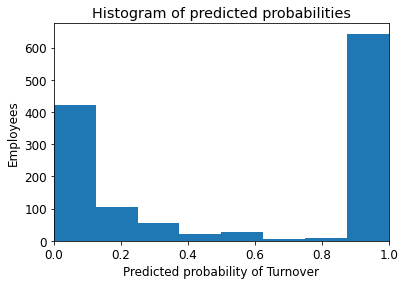

In [ ]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# adjust the font size 
plt.rcParams['font.size'] = 12
# histogram of predicted probabilities

# 8 bins
plt.hist(y_pred_prob, bins=8)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of Turnover')
plt.ylabel('Employees')

In [ ]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print('ROC_AUC_score' , metrics.roc_auc_score(y_test, y_pred_prob))

ROC_AUC_score 1.0


In [ ]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(RF, X, y, cv=10, scoring='roc_auc').mean()

0.9999923215304287

In [ ]:
# print the first 100 true and predicted responses
print('True:', y_test.values[0:100])

print('False:', RFCy_pred[0:100])

True: [0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0
 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0
 1 0 1 1 1 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 1]
False: [0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0
 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 1]


In [ ]:
y_true = [0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1]

y_pred = [0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1]

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

target_names = ['0-Active', '1-Resigned'] 

results = confusion

print ('Confusion Matrix :',results) 
print ('Accuracy Score :', accuracy_score(y_true, y_pred)) 
print ('Report :', classification_report(y_true, y_pred)) 

Confusion Matrix : [[604  37]
 [  0 642]]
Accuracy Score : 0.97
Report :               precision    recall  f1-score   support

           0       1.00      0.94      0.97        53
           1       0.94      1.00      0.97        47

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100





*  We have got a classification rate of 97%, considered as good accuracy.
*  Precision is about being precise like how precise our Random Forest model is. In other words we can say, when a model makes a prediction, how often it is correct. In our prediction case, when our Random Forest model predicted an employee is going to resign, that employee actually left 94% of the time.

 

*  Recall is if there is an employee who resign present in the test set and our Random Forest model can identify it 100% of the time. 



In [ ]:
#Based on the 100 data above since 642 is too much
resultdf = pd.DataFrame()
resultdf['actual'] = y_true
resultdf['predict'] = y_pred
pd.set_option('display.max_rows', None)
resultdf

,actual,predict
0,0,0
1,1,1
2,1,1
3,0,0
4,0,0
5,0,0
6,0,0
7,1,1
8,1,1
9,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7137e4e80>,
      dtype=object)

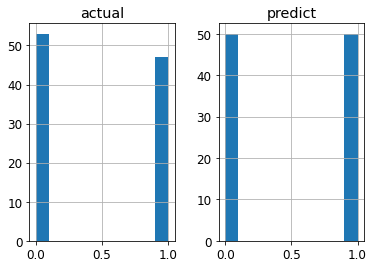

In [ ]:
resultdf.hist()

Text(0.5, 1.0, 'Predicted vs Actual')

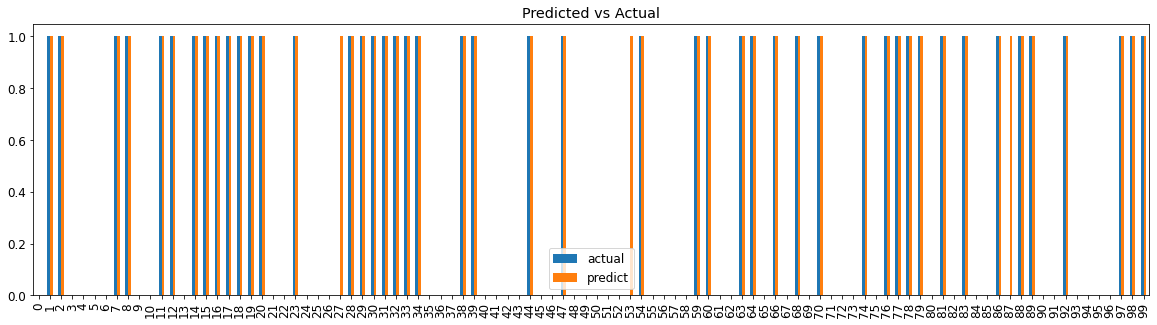

In [ ]:
resultdf.plot.bar(figsize=(20, 5))
plt.title('Predicted vs Actual')



###   **---THE END---**




